In [1]:
import numpy as np
import sympy
sympy.init_printing(use_unicode=True)
from sympy import *
from sympy.solvers import solve
from sympy.solvers.ode import dsolve
from IPython.display import display
from typing import Callable
from sympy.utilities.lambdify import lambdify, implemented_function

%matplotlib inline
import matplotlib.pyplot as plt

def simplified(exp, title=None):
    simp = simplify(exp)
    if simplified.LOG:
        if title: display(title,simp)
        else: display(simp)
    return simp
simplified.LOG = True

def firstOrderCondition(exp, var):
    diffExp = simplified(diff(exp, var))
    solutions = solve(diffExp, var)
    if firstOrderCondition.LOG:
        display(solutions)
    return solutions
firstOrderCondition.LOG = True
  
class Result(object):   # a class for holding results of calculations
    def __repr__(self): return self.__dict__.__repr__()
    def display(self):
        for k,v in sorted(self.__dict__.items()):
            display(k,v)
    def subs(self, params):
        ans = Result()
        for k,v in sorted(self.__dict__.items()):
            if hasattr(v,"subs"):
                ans.__dict__[k] = v.subs(params)
            else:
                ans.__dict__[k] = v
        return ans

# Symbolic calculations

In [2]:
a,p,r,b,vmax,zmin,zmax,beta = symbols('a \\phi r z v_{\max} z_{\min} z_{\max} \\beta', positive=True,finite=True,real=True)
w,T,D,L,n,Supply = symbols('w T \\Delta \\ell n \\tau', positive=True,finite=True,real=True)
D,Supply,p

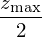

In [3]:
def exactCostPerDay(T):
    return (a*p + w*b*( (1+r)**T - 1 )) / T

def approxCostPerDay(T):
    return a*p/T + w*b*r

def symmetricLifetime(w):
    return w**2/4/L

def asymmetricLifetime(w):
    return w / D


uniformPDF = Piecewise( (1 / zmax , b<zmax), (0, True) )
powerlawPDF =  Piecewise( (0 , b<zmin), (zmin / b**2, True) )

display(sympy.integrate(uniformPDF, (b, 0, sympy.oo)))  # should be 1
display(sympy.integrate(powerlawPDF, (b, 0, sympy.oo))) # should be 1
display(sympy.integrate(b*uniformPDF, (b, 0, sympy.oo)))  # should be zmax/2
display(sympy.integrate(b*powerlawPDF, (b, 0, sympy.oo))) # should be infinity!

In [4]:
params = {
    L: 10,           # total transfers per day 
    D: 6,            # delta transfers per day 
    beta: 0.01,      # value / transfer-size
    r: 4/100/365,    # interest rate per day
    a: 1.1,          # records per reset tx
    Supply: 288000,  # records per day
    zmin: 0.001,     # min transfer size (for power law distribution)
    zmax: 1,         # max transfer size (for uniform distribution)
}

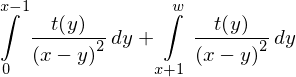

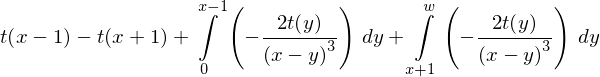

In [31]:
x,y,t=symbols("x y t")
intt = 1 + simplified(sympy.integrate(t(y)/(x-y)**2, (y,0,x-1)) + sympy.integrate(t(y)/(x-y)**2, (y,x+1,w)))
intt.diff(x)

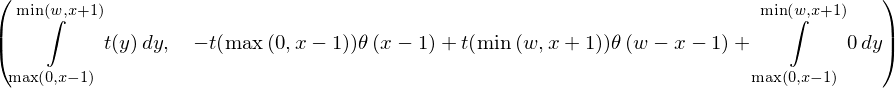

In [36]:
intu = sympy.integrate(t(y), (y, sympy.Max(0,x-1),sympy.Min(w,x+1)))
intu, intu.diff(x)

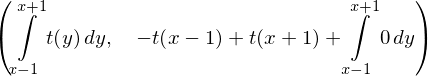

In [43]:
intr = sympy.integrate(t(y), (y, x-1, x+1))
intr, intr.diff(x)

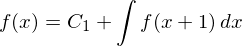

In [6]:
from sympy import *
x = symbols("x")
f = Function("f")
f_ = Derivative(f(x),x)
dsolve(f_ - f(x+1), f(x))

In [ ]:
### See solution in https://stackoverflow.com/a/46755444/827927